# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [21]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [22]:
# Your work here.
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import scipy.stats as st
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.weightstats import ztest

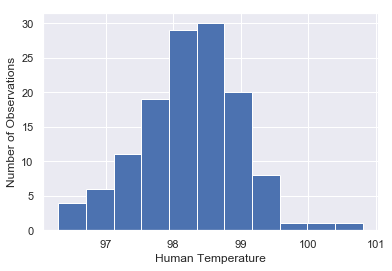

In [24]:
#look at histogram of temperature
numbins = int(np.sqrt(len(df['temperature'])))
_ = plt.hist(df['temperature'], bins=numbins)
_ = plt.xlabel('Human Temperature')
_ = plt.ylabel('Number of Observations')
plt.show()

Based on the histogram, body temperature appears to be normally distributed.
Will also look at the empirical cumulative distribution function.

In [25]:
#create empirical cumulative distribution function
def ecdf(data):
    n = len(data) #number of data points
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y


In [26]:
#calcutlate mean and standard deviation of temperature and generate samples
MeanTemp = np.mean(df['temperature'])
STDTemp = np.std(df['temperature'])
TempTheor = np.random.normal(MeanTemp, STDTemp, 10000)

#create x and y values for the temperature data and for the theoretical data
x_theor, y_theor = ecdf(TempTheor)
x_temp, y_temp = ecdf(df['temperature'])

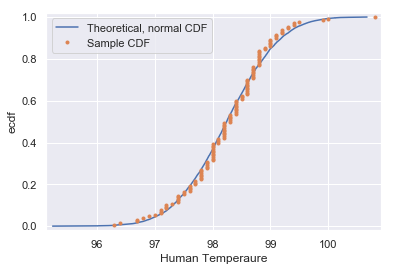

In [16]:
#plot the ecdf
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')
_ = plt.xlabel('Human Temperaure')
_ = plt.ylabel('ecdf')
_ = plt.legend(['Theoretical, normal CDF', 'Sample CDF'])
plt.margins(0.02)
plt.show()

1. Based on the above visualizations, the temperature data is normally distributed.

2. Given that a sample size of 30 is considered large and normally distributed, at 130 observations we have a large sample.  Without more information on the population, it is difficult to say with certainty if the sample is independent.  However, given the variation in the observations, it is reasonable that the samples are independent. 

#### 3.1. First, use the bootstrap method to test for a mean = 98.6
Null Hypothesis: Mean = 98.6
Alternative Hypothesis: Mean <> 98.6

In [27]:
#Set up bootstrap functions
def bootstrap_replicates_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicates_1d(data, func)
        
    return bs_replicates
  

In [29]:
#Draw samples from a shifted distribution
np.random.seed(15) #set random seed

shifted_temps = df.temperature - MeanTemp + 98.6 #shift distribution to a mean of 98.6

# Draw bootstrap replicates of shifted temperatures:
shifted_replicates = draw_bs_reps(shifted_temps, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature mean, p-value:
p = np.sum(shifted_replicates <= MeanTemp) / len(shifted_replicates)

# Print the p-value:
print('p-value =', p)


p-value = 0.0


3.1. Based on the bootstrap results with a p-value of 0, we would reject the null hypothesis and say  that the mean body temperature is not equal to 98.6.

3.2. Given that there is only sample a one sample test is appropriate.  Also, 130 samples with a normal distribution suggests we can use the Z score. The z statistic can be calculated using the difference between the sample mean and 98.6.

In [32]:
# z test statistic
test_stat = (MeanTemp - 98.6) / (STDTemp / np.sqrt(len(df)))
test_stat

-5.475925202078116

In [34]:
# multiply p-value for z times because it's a two tailed test.
p_value_z = stats.norm.cdf(test_stat) * 2
p_value_z

4.3523151658821886e-08

In [52]:
z2 = ztest(df.temperature,value=98.6)
z2

(-5.4548232923645195, 4.9021570141012155e-08)

3.2. .000000043523 is far less than .05 (confidence level) strongly suggesting rejection of the null hypothesis.

In [37]:
# The same test statistic can be used for the t test.
p_value_t = stats.t.sf(abs(test_stat), len(df)-1) * 2
p_value_t

2.1887464624095175e-07

In [55]:
t2 = stats.ttest_1samp(df.temperature, 98.6)
t2

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

3.2. .000000218875 is also far less than .o5; reject null hypothesis.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [57]:
# p-value based on z test from sample
sample1 = np.random.choice(df.temperature, 10)
sample1
s1_mean = np.mean(sample1)
s1_std = np.std(sample1)
s1_test = (s1_mean - 98.6) / (s1_std / np.sqrt(10))
s1_test
s1_test_z = stats.norm.cdf(s1_test) * 2
s1_test_z

0.0014885133393078127

In [58]:
s1_z2 = ztest(sample1, value=98.6)
s1_z2

(-3.01388494546202, 0.0025792559967884056)

In [59]:
# p-value based on t test from sample
s1_test_t = stats.t.sf(abs(s1_test), 9) * 2
s1_test_t

0.011240382877506148

In [60]:
s1_t2 = stats.ttest_1samp(sample1, 98.6)
s1_t2

Ttest_1sampResult(statistic=-3.01388494546202, pvalue=0.014623490148785633)

4. With only 10 samples, the t test may be better.

### 5. What temperature is considered abnormal - Bootstrap

In [63]:
np.random.seed(15) #set random seed

bs_reps = draw_bs_reps(df.temperature, np.mean, 10000) #draw bs replicates

ConfIntBS = np.percentile(bs_reps, [2.5, 97.5]) #calculate 95% confidence interval

print('Bootstrap based 95% confidence interval for human body temperature:', ConfIntBS, 'degrees F')


Bootstrap based 95% confidence interval for human body temperature: [98.12153846 98.37538462] degrees F


### 5. What temperature is considered abnormal - frequentist

In [68]:
SampMean = np.mean(df.temperature)
SampSTD = np.std(df.temperature)
SampRand = np.random.normal(SampMean, SampSTD, size=10000)

ConfIntFreq = np.percentile(SampRand, [2.5, 97.5])

print('Frequentist based 95% confidence interval for human body temperature:', ConfIntFreq, 'degrees F')

#Get t and z values for 95% confidence interval
t = st.t.ppf(0.975,len(df.temperature)-1)
z = st.norm.ppf(0.975)
print('95% confidence t =',t)
print('95% confidence z =',z)

t_95 = [SampMean-t*SampSTD, SampMean+t*SampSTD]
z_95 = [SampMean-z*SampSTD, SampMean+z*SampSTD]

print('95% confidence interval using t stat = ',t_95)
print('95% confidence interval using z stat = ',z_95)

Frequentist based 95% confidence interval for human body temperature: [96.82235634 99.67314136] degrees F
95% confidence t = 1.978524491458605
95% confidence z = 1.959963984540054
95% confidence interval using t stat =  [96.80420001613984, 99.69426152232171]
95% confidence interval using z stat =  [96.81775582674824, 99.68070571171332]


#### 5. Looks as if an abnormal temperature is one below 96.8 degrees Fahrenheit, and one above 99.7 degrees Fahrenheit.

## 6. Examine difference between male and female body temperature

### Null Hypothesis: Mean male temperature = Mean female temperature
### Alt. Hupothesis: Mean male temperature <> Mean female temperature

#### Calclulate mean, std, or each
#### Shift mean of one to the other
#### Draw bootstrap samples of shifted distribution, and calculate p-value
#### compare p-value to .05, 95% confidence interval


In [76]:
Mtemp = df[df.gender == 'M'].temperature
Ftemp = df[df.gender == 'F'].temperature

Mmean = np.mean(Mtemp)
Fmean = np.mean(Ftemp)

Mstd = np.std(Mtemp)
Fstd = np.std(Ftemp)

print('The mean temperature for males is', Mmean, 'and the standard deviation is', Mstd)
print('The mean temperature for females is', Fmean, 'and the standard deviation is', Fstd)

The mean temperature for males is 98.1046153846154 and the standard deviation is 0.6933598841828696
The mean temperature for females is 98.39384615384613 and the standard deviation is 0.7377464486428966


In [81]:
MaleShifted = Mtemp - Mmean + Fmean

male_bs_reps = draw_bs_reps(MaleShifted, np.mean, 10000)

p = np.sum(male_bs_reps <= Mmean) / len(male_bs_reps)

print('p-value:', p)

p-value: 0.0005


### 6. The .0005 p-value indicates rejecting the null hypothesis; male and female body temperatures are not equal.